In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ioy1e35x because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [90]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen//Ntuples/Combined_GenIfo_aToTauTau_after_unbaising.root")
RHTree = file["fevt/RHTree"]

In [91]:
RHTree.keys()
# RHTree.typenames()
# RHTree.show()

['Event',
 'Run',
 'LumiSection',
 'GenA1_inv',
 'GenA1',
 'dR_A1_Tau1',
 'dR_A1_Tau2',
 'dR_Tau1_Tau2',
 'A1_pt',
 'Tau1_pt',
 'Tau2_pt',
 'A1_eta',
 'Tau1_eta',
 'Tau2_eta',
 'A1_phi',
 'Tau1_phi',
 'Tau2_phi',
 'Tau1_Tau2_deta',
 'Tau1_Tau2_dphi']

In [92]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

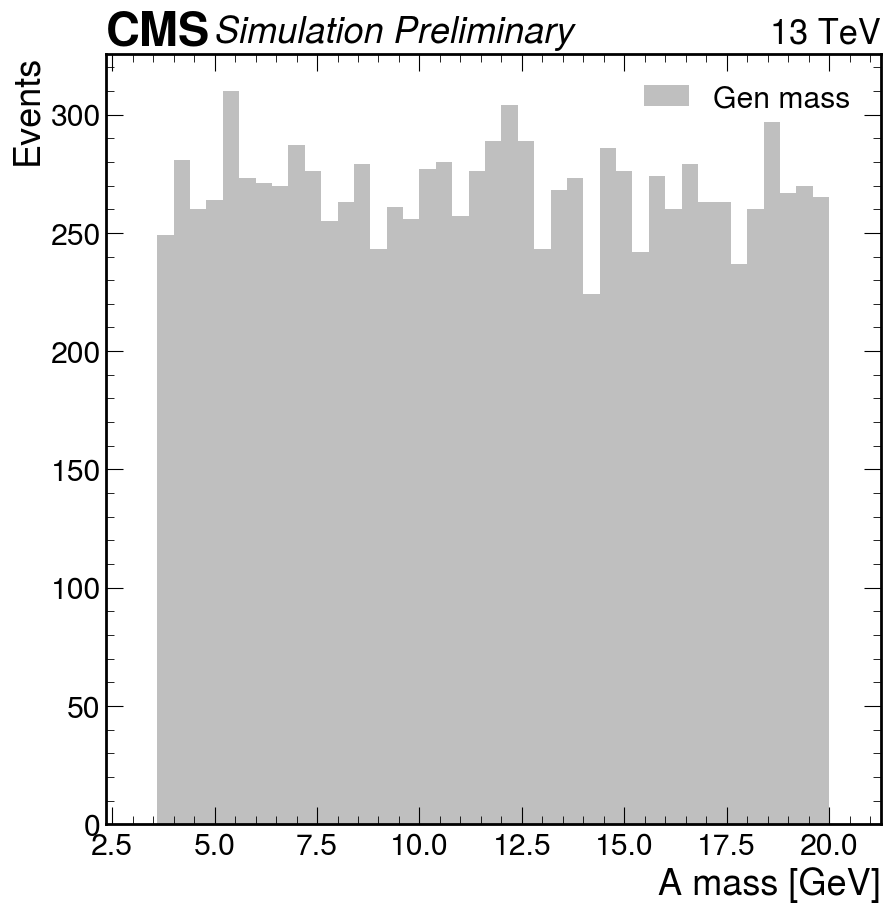

In [93]:
# GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(10,10))
# plt.hist(GenA1_invariant,bins=np.arange(3.2,20.5,0.4),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA1,bins=np.arange(3.2,20.5,0.4),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="Gen mass")
# plt.xticks(np.arange(3.6,21,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("A mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
plt.show()

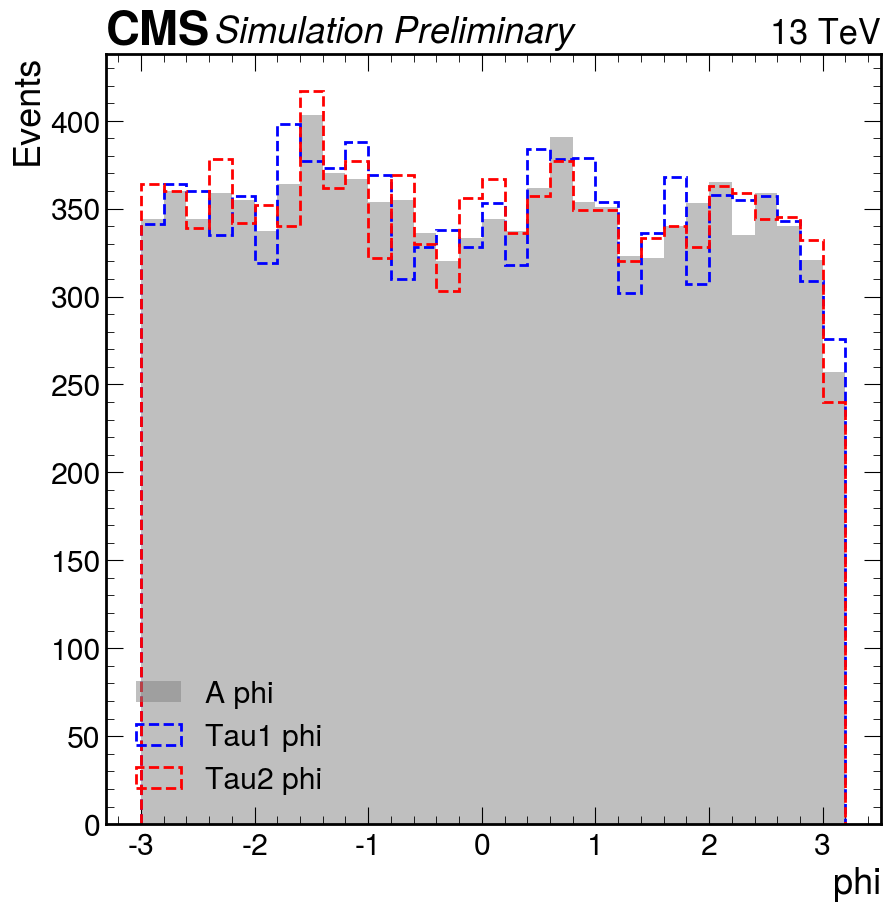

In [94]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
Tau2_phi = RHTree.arrays(["Tau2_phi"],"Tau2_phi > -111",library="pd")['Tau2_phi']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_phi,bins=np.arange(-3.0,3.4,.2),color='grey',alpha=0.5,label="A phi")
plt.hist(Tau1_phi,bins=np.arange(-3.0,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 phi")
plt.hist(Tau2_phi,bins=np.arange(-3.0,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 phi")
# plt.xticks(np.arange(-3.0,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

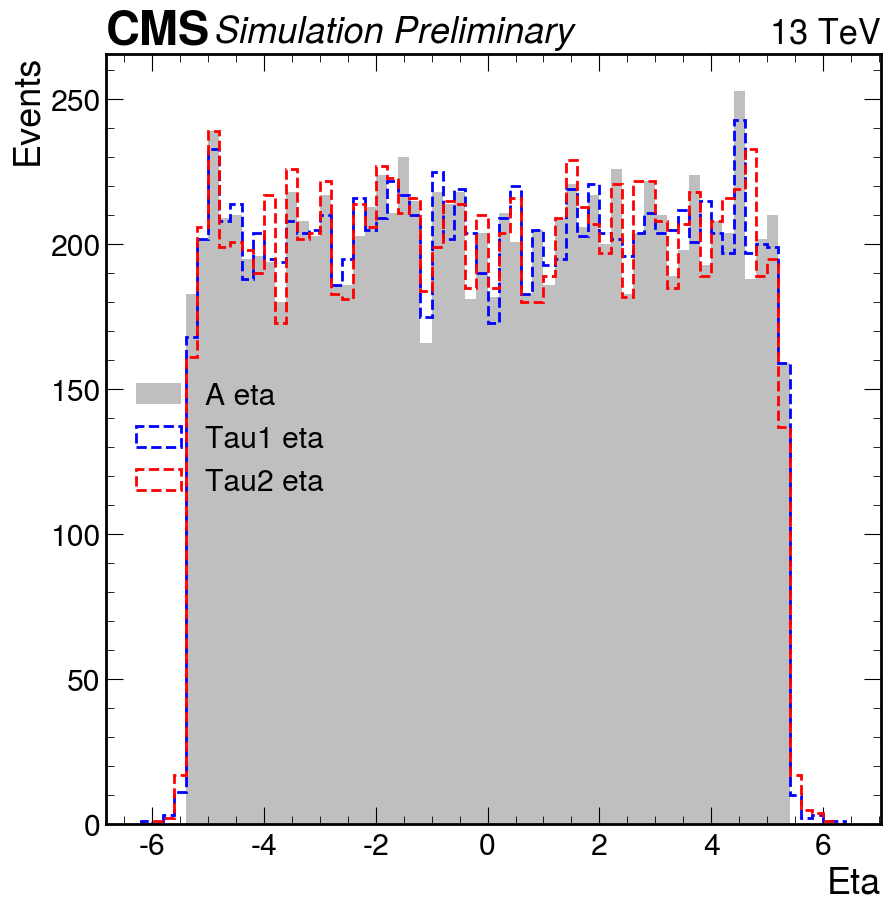

In [95]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_eta,bins=np.arange(-6.2,6.4,.2),color='grey',alpha=0.5,label="A eta")
plt.hist(Tau1_eta,bins=np.arange(-6.2,6.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-6.2,6.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 eta")
# plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("Eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

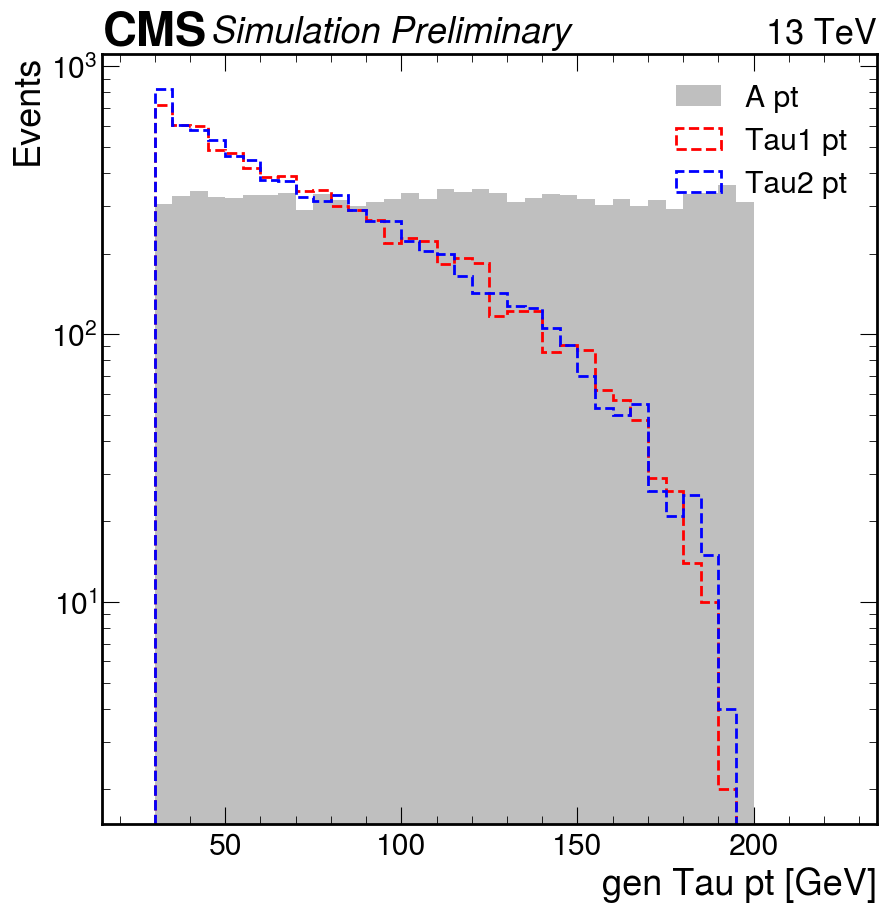

In [97]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']


fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_pt,bins=np.arange(25,226,5),color='grey',alpha=0.5,label="A pt",log=True)
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")

# plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

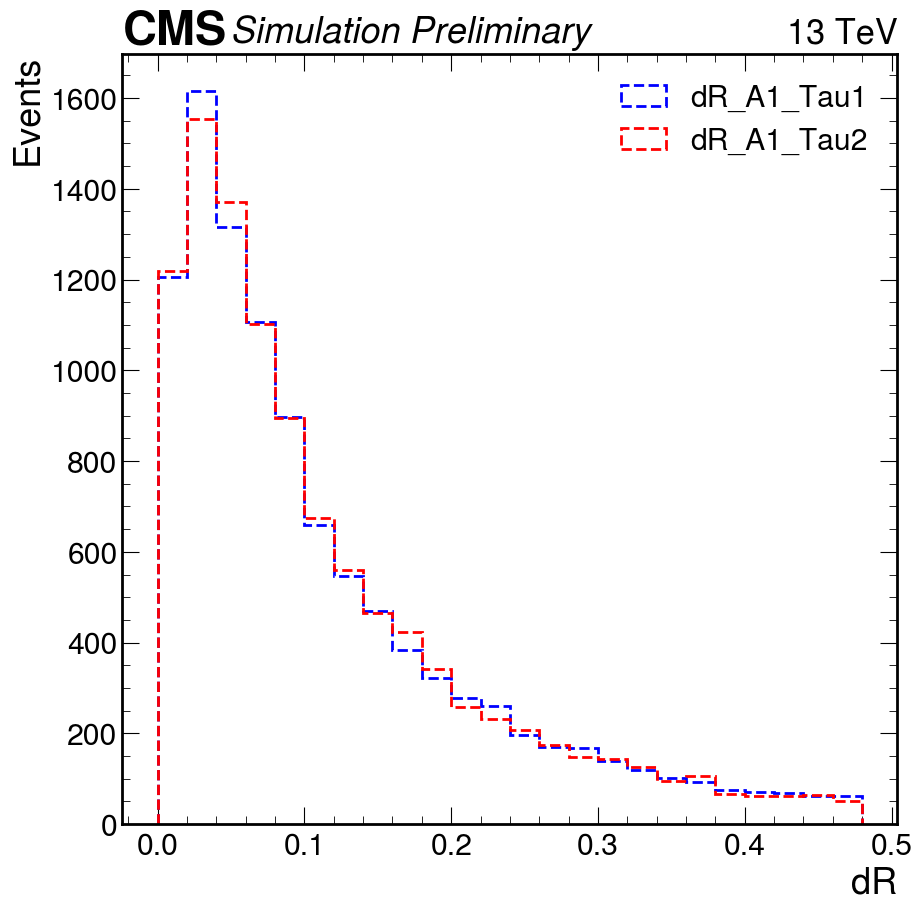

In [98]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")

# plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

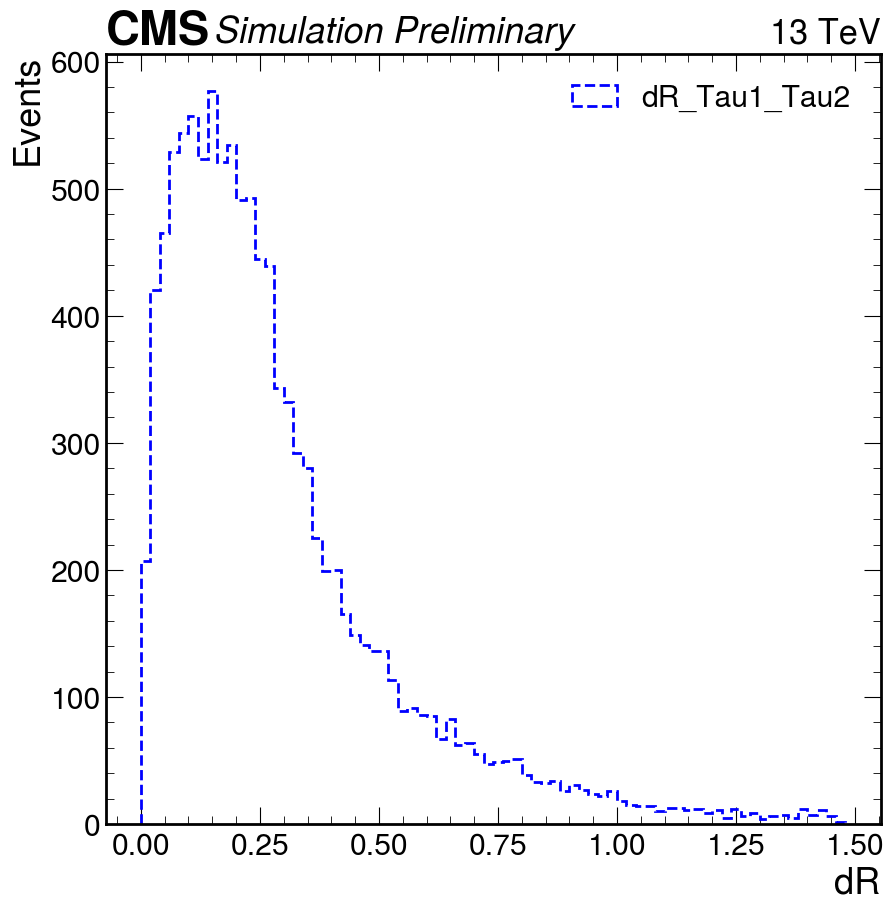

In [99]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")

# plt.xticks(np.arange(0,1,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

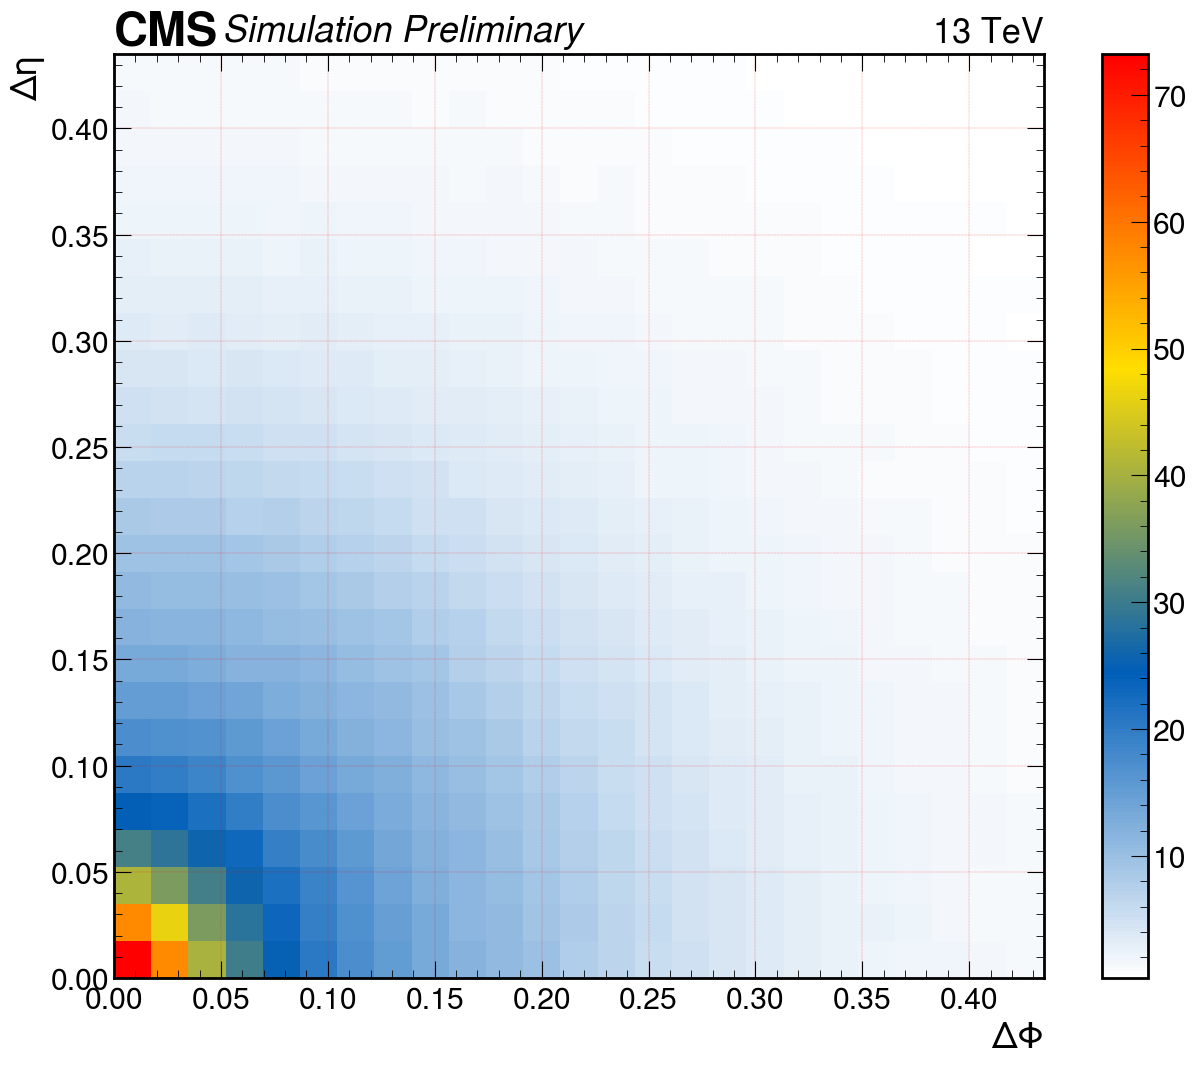

In [11]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
fig, ax = plt.subplots(figsize=(15,12))
plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
# plt.xticks(np.arange(0,.44,0.0174),size=5)
# plt.yticks(np.arange(0,.44,0.0174),size=12)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

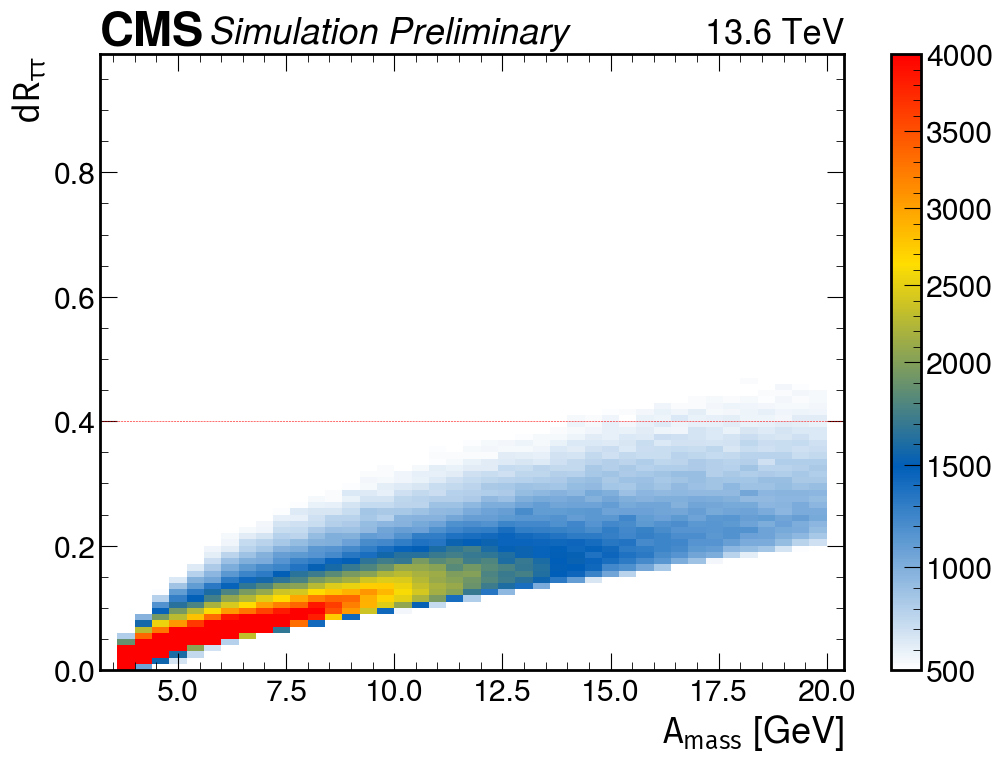

In [74]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(GenA1, dR_Tau1_Tau2, bins=[np.arange(3.2,20.5, .4), np.arange(0,1,0.01)],cmap=cms_cmap, norm=norm)
plt.xlabel(r'$\mathrm{A_{mass}} $ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

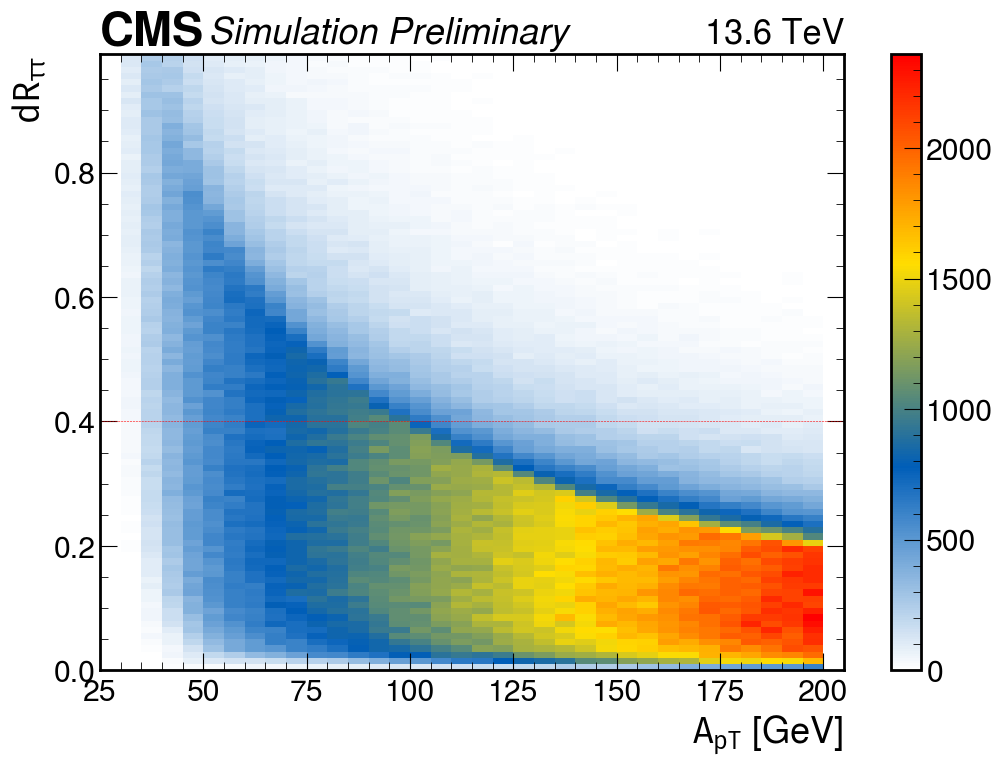

In [75]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_pt, dR_Tau1_Tau2, bins=[np.arange(25,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

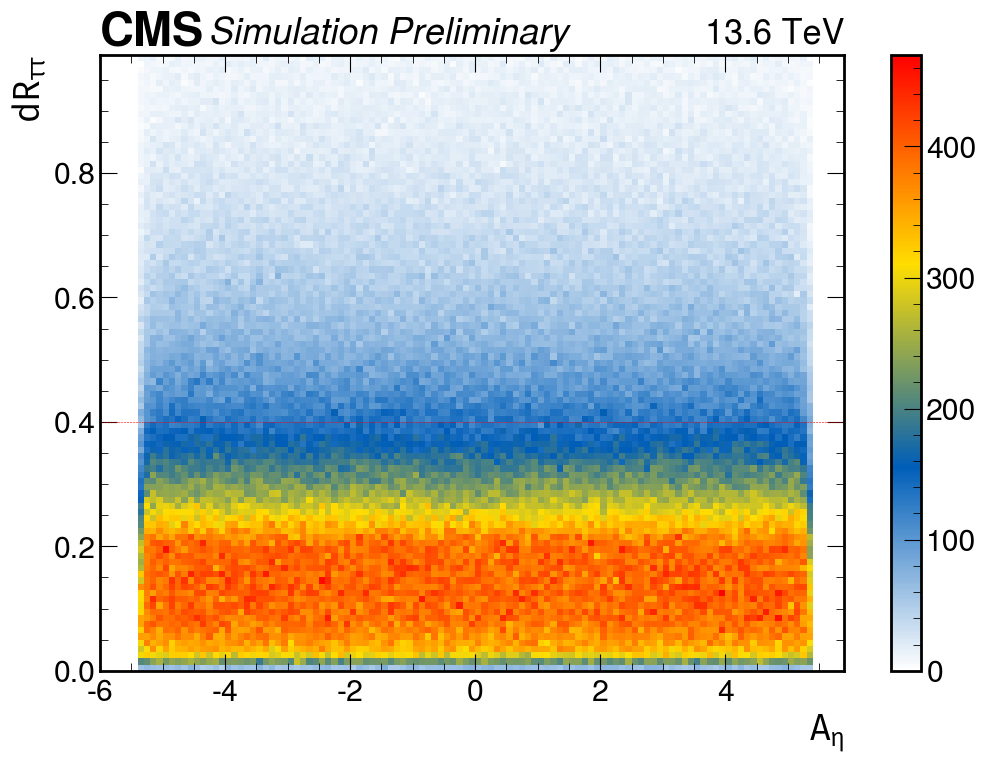

In [76]:
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{\eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

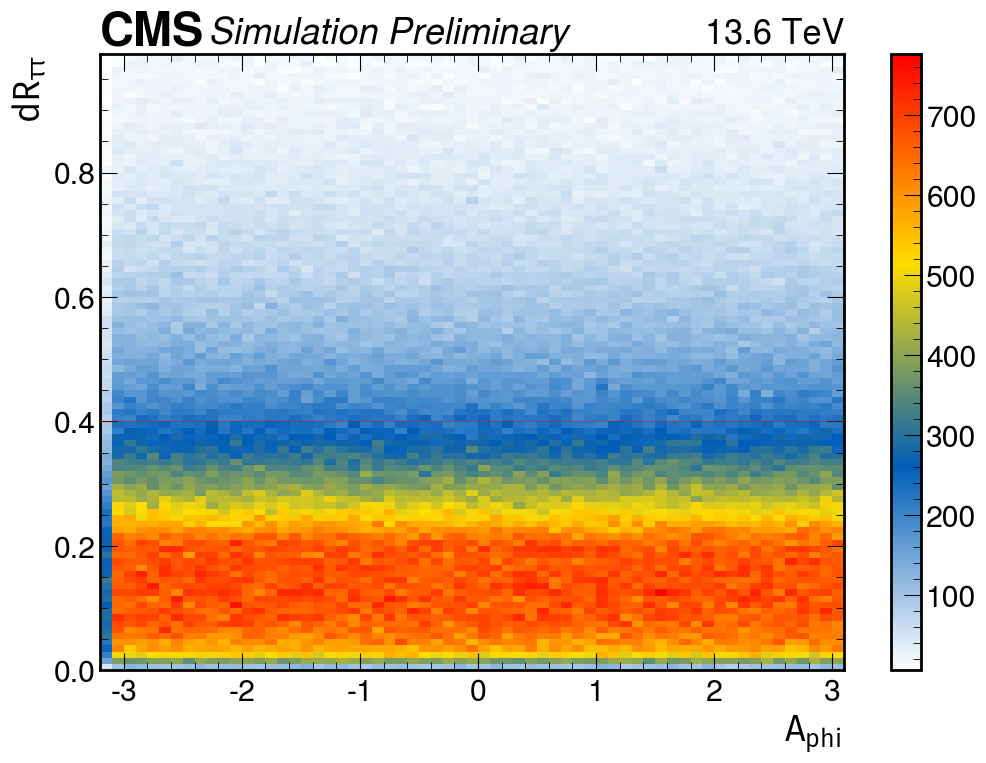

In [77]:
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

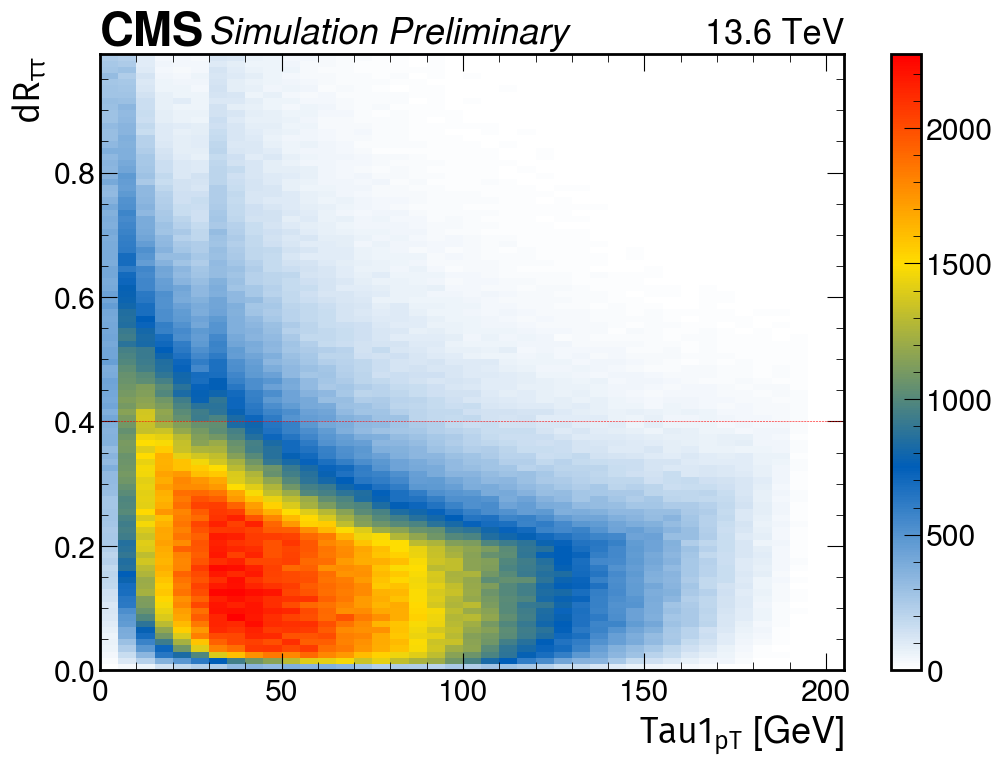

In [80]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

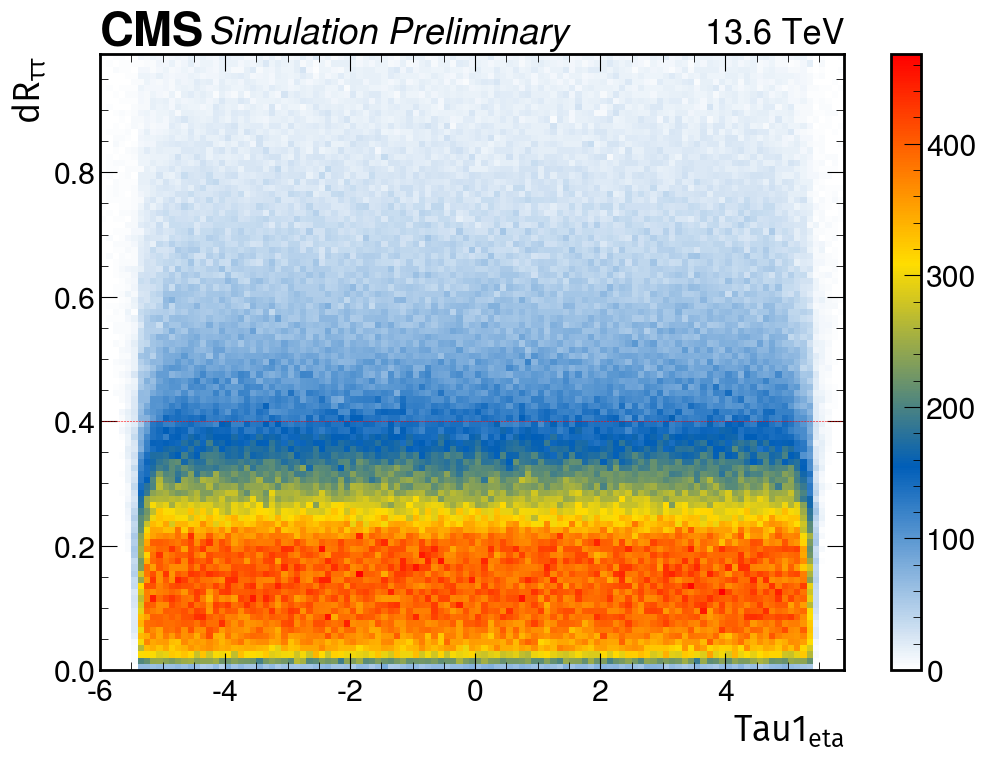

In [82]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

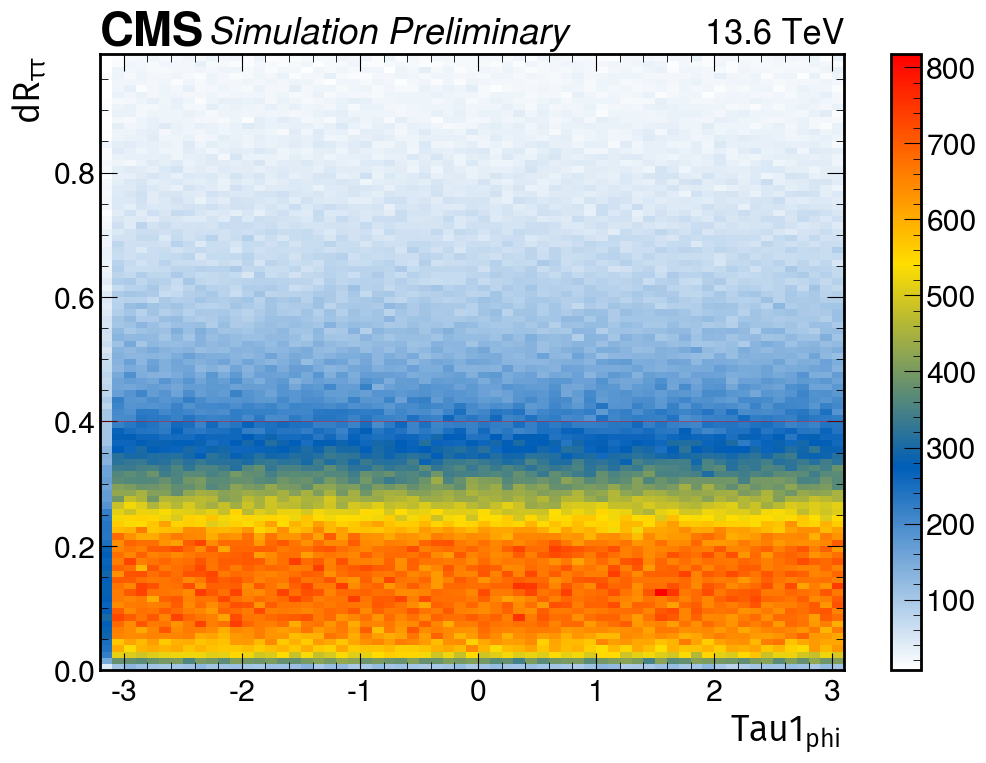

In [83]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

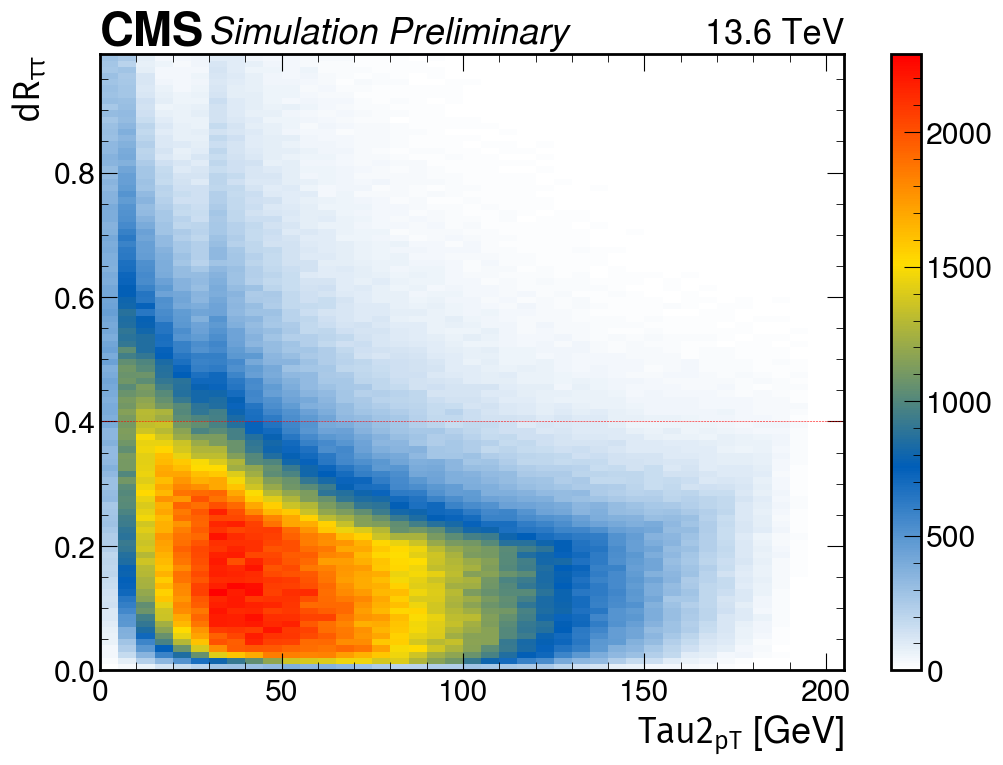

In [84]:
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau2_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau2_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

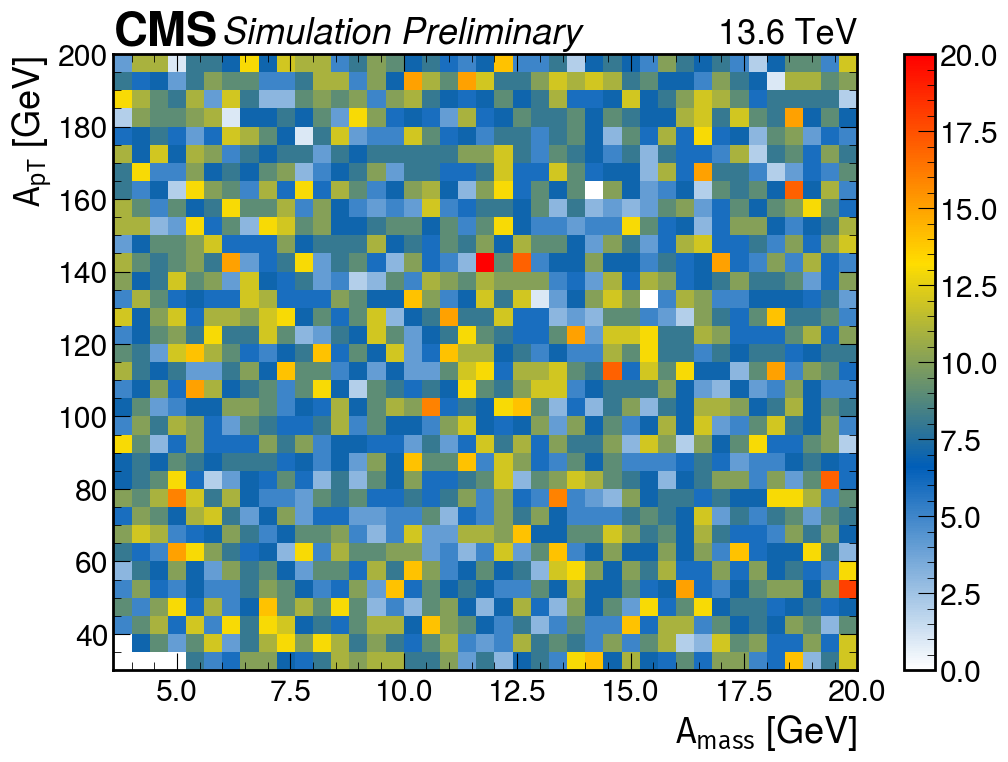

[[ 0.  0.  5. ... 13.  8.  4.]
 [ 0.  7.  9. ... 11.  6. 11.]
 [ 0.  9. 11. ...  9.  7. 11.]
 ...
 [ 3. 10.  9. ...  8. 11.  9.]
 [ 8.  6.  3. ...  8.  9.  5.]
 [12. 12.  9. ...  2. 10. 12.]]


In [100]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(3.6,20.1, .4), np.arange(30,201,5)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 
print(counts)

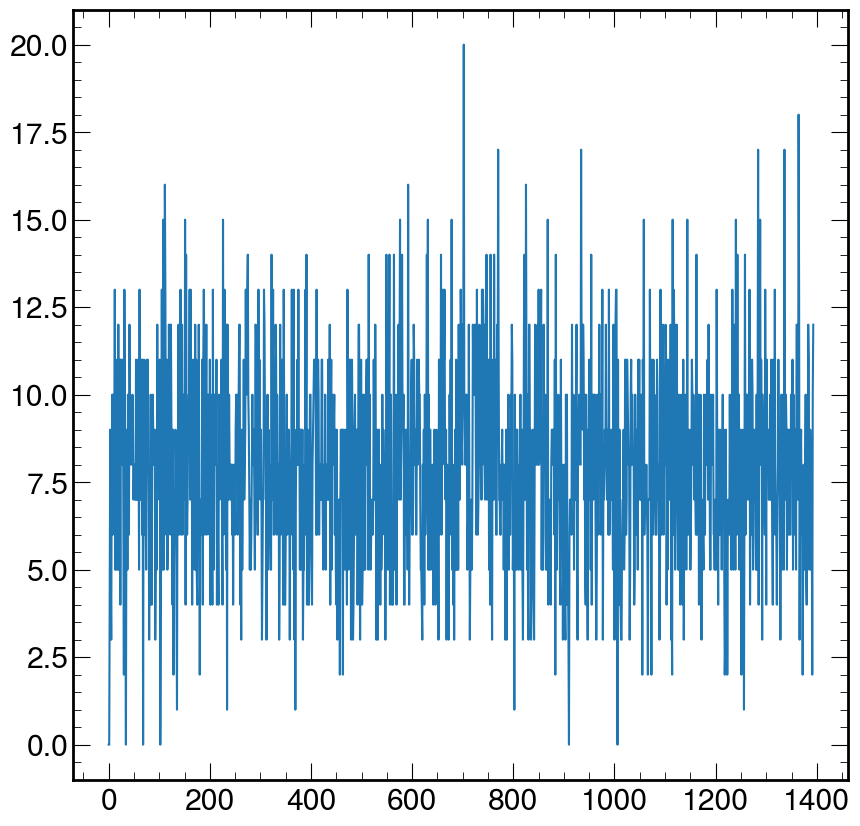

In [101]:
plt.plot(np.arange(0,len(counts.flatten()),1), counts.flatten())

In [41]:
outlist = counts.flatten()
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(4,20.1,0.4))*len(np.arange(35,201,5))):
  if (i%34 == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

0, 0, 63, 572, 1012, 1150, 1226, 1193, 1227, 1272, 1157, 1256, 1199, 1257, 1189, 1232, 1255, 1185, 1198, 1235, 1248, 1242, 1238, 1199, 1316, 1216, 1207, 1242, 1276, 1274, 1212, 1220, 1123, 1273, 
0, 45, 536, 1007, 1342, 1405, 1427, 1427, 1354, 1366, 1397, 1366, 1334, 1341, 1381, 1425, 1466, 1485, 1363, 1422, 1374, 1394, 1419, 1371, 1382, 1458, 1409, 1389, 1463, 1443, 1440, 1422, 1436, 1420, 
0, 208, 761, 1156, 1305, 1378, 1336, 1433, 1381, 1441, 1384, 1349, 1381, 1472, 1418, 1472, 1341, 1263, 1409, 1364, 1393, 1410, 1358, 1449, 1427, 1353, 1414, 1366, 1399, 1428, 1361, 1357, 1348, 1395, 
0, 369, 913, 1239, 1300, 1404, 1287, 1401, 1420, 1342, 1344, 1288, 1366, 1337, 1421, 1282, 1363, 1290, 1339, 1402, 1314, 1401, 1324, 1327, 1304, 1335, 1428, 1284, 1336, 1408, 1321, 1380, 1401, 1306, 
8, 472, 852, 1221, 1300, 1338, 1247, 1404, 1229, 1347, 1298, 1279, 1269, 1420, 1295, 1353, 1325, 1307, 1343, 1362, 1364, 1313, 1392, 1341, 1434, 1287, 1314, 1363, 1368, 1275, 1381, 1291, 1329, 1436, 
35, 5

In [31]:
print(min(outlist), max(outlist), counts.shape)

0.0 1485.0 (41, 34)


In [34]:
print(len(np.arange(4,20.1,0.4)), len(np.arange(35,201,5)))

41 34


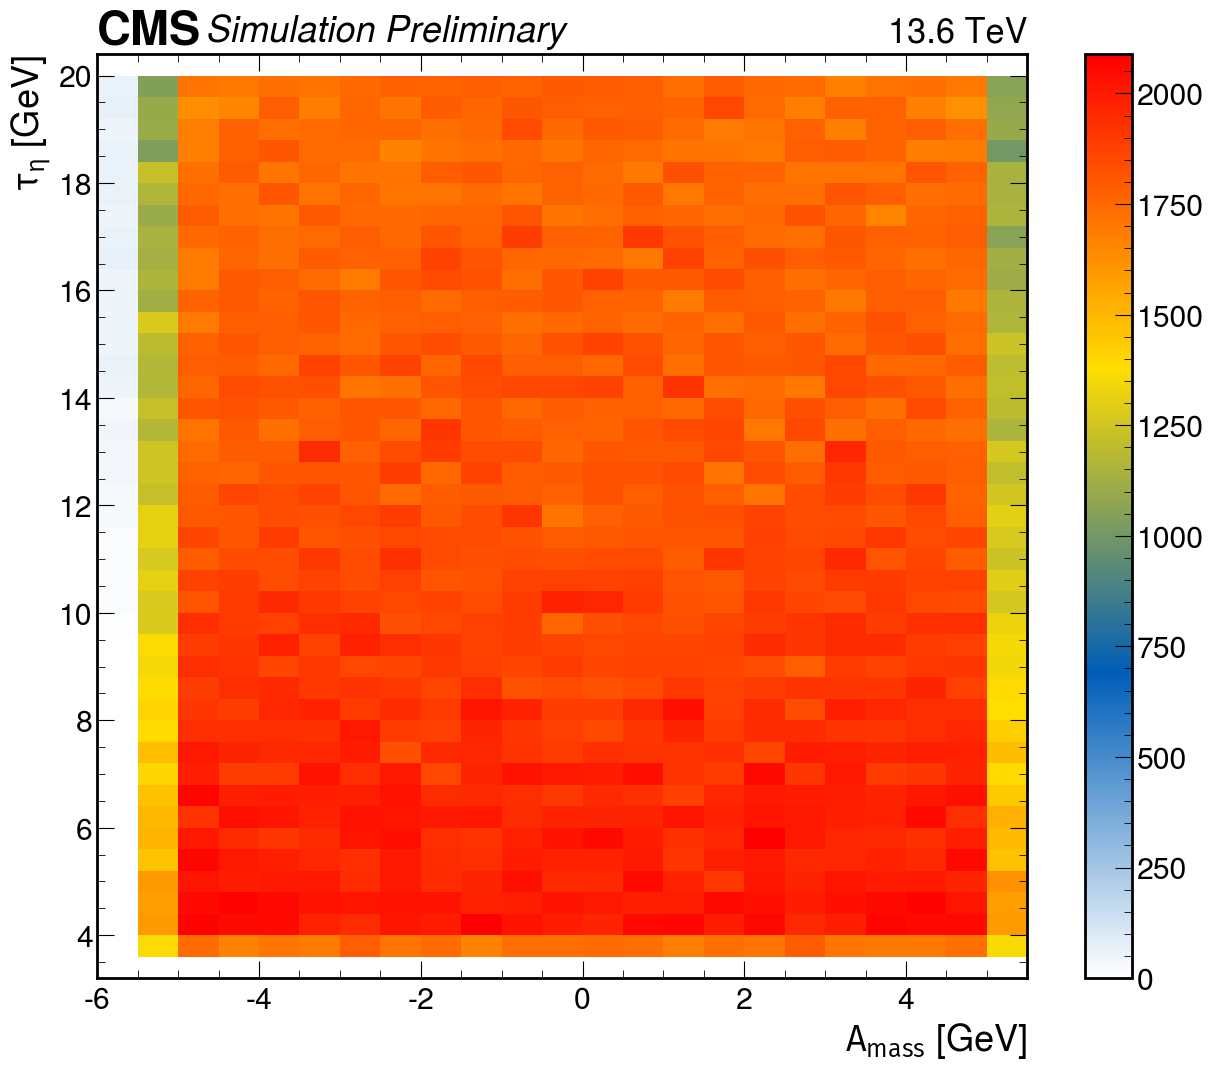

In [16]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']

fig, ax = plt.subplots(figsize=(15,12), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_eta, GenA1,  bins=[ np.arange(-6,6,0.5), np.arange(3.2,20.5, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{\tau_{\eta}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  